<a href="https://colab.research.google.com/github/rkkapali/steamgamesdataset/blob/main/games_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
print("Ready to go!")

Ready to go!


In [159]:
file_path = '/content/games.csv'
df = pd.read_csv(file_path)

In [160]:
# Displaying the first few rows to understand the data
print("Initial Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Initial Dataset Preview:
                   AppID          Name Release date  Estimated owners  \
0       Galactic Bowling  Oct 21, 2008    0 - 20000               0.0   
1           Train Bandit  Oct 12, 2017    0 - 20000               0.0   
2           Jolt Project  Nov 17, 2021    0 - 20000               0.0   
3               Henosis™  Jul 23, 2020    0 - 20000               0.0   
4  Two Weeks in Painland   Feb 3, 2020    0 - 20000               0.0   

   Peak CCU  Required age  Price  DiscountDLC count  \
0       0.0         19.99    0.0                  0   
1       0.0          0.99    0.0                  0   
2       0.0          4.99    0.0                  0   
3       0.0          5.99    0.0                  0   
4       0.0          0.00    0.0                  0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a n

In [80]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

pd.set_option('display.max_columns', None)


Basic Statistics:
       Estimated owners      Peak CCU  Required age    Price  \
count      9.741000e+04  97410.000000  97410.000000  97410.0   
mean       1.267090e-04      0.013452      7.086262      0.0   
std        5.985601e-03      0.102109     12.387782      0.0   
min        0.000000e+00      0.000000      0.000000      0.0   
25%        0.000000e+00      0.000000      0.990000      0.0   
50%        0.000000e+00      0.000000      4.190000      0.0   
75%        7.786537e-07      0.000000      9.990000      0.0   
max        1.000000e+00      1.000000    999.980000      0.0   

       DiscountDLC count  Metacritic score    User score      Positive  \
count       97410.000000      97410.000000  97410.000000  9.741000e+04   
mean            0.493081          0.030507      0.034791  8.489366e+02   
std            12.832834          0.149953      1.674105  2.287011e+04   
min             0.000000          0.000000      0.000000  0.000000e+00   
25%             0.000000          

In [81]:
# Displaying all column names
print("Column Names in the Dataset:")
print(df.columns.tolist())

Column Names in the Dataset:
['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DiscountDLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies', '360 Video', 'Accounting', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Episodic', 'Free To Play', 'Free to Play', 'Game Development', 'Gore', 'Indie', 'Massively Multiplayer', 'Movie', 'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content', 'Short', 'Simu

In [161]:
# Initial Data Exploration
print("Dataset Shape:", df.shape)

Dataset Shape: (82400, 111)


In [162]:
# ensuring that X and y are properly aligned DataFrames/Series
X = pd.DataFrame(X).reset_index(drop=True)
y = pd.Series(y).reset_index(drop=True)

In [84]:
# Dropping irrelevant columns
columns_to_drop = ['AppID', 'Header image', 'Website', 'Support url', 'Support email',
                   'Metacritic url', 'Screenshots', 'Movies', 'Notes', 'About the game']
df_cleaned = df.drop(columns=columns_to_drop)

In [163]:
# Inspecting the Price column
print("Raw Price column (first 20 rows):")
print(df['Price'].head(20))
print("\nPrice summary before any processing:")
print(df['Price'].describe())
print("Number of zero prices:", (df['Price'] == 0).sum())
print("Number of missing prices:", df['Price'].isnull().sum())
print("Data type of Price:", df['Price'].dtype)

Raw Price column (first 20 rows):
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: Price, dtype: float64

Price summary before any processing:
count    82400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Price, dtype: float64
Number of zero prices: 82400
Number of missing prices: 0
Data type of Price: float64


In [85]:
# Converting to numeric midpoint
def parse_owners(owners_str):
    if isinstance(owners_str, str) and '-' in owners_str:
        low, high = map(int, owners_str.split(' - '))
        return (low + high) / 2
    return np.nan

df_cleaned['Estimated owners'] = df_cleaned['Estimated owners'].apply(parse_owners)

In [180]:
print("Before cleaning - Price summary:")
print(df['Price'].describe())
print("Number of zero prices:", (df['Price'] == 0).sum())
print("Number of missing prices:", df['Price'].isnull().sum())

print("\nAfter cleaning - Price summary:")
print(df_cleaned['Price'].describe())
print("Number of zero prices after cleaning:", (df_cleaned['Price'] == 0).sum())
print("Number of missing prices after cleaning:", df_cleaned['Price'].isnull().sum())

Before cleaning - Price summary:
count    82400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Price, dtype: float64
Number of zero prices: 82400
Number of missing prices: 0

After cleaning - Price summary:
count    82400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Price, dtype: float64
Number of zero prices after cleaning: 82400
Number of missing prices after cleaning: 0


In [156]:
# Handling missing values
df_cleaned['Metacritic score'] = df_cleaned['Metacritic score'].fillna(df_cleaned.groupby('Genres')['Metacritic score'].transform('mean'))
df_cleaned['Metacritic score'] = df_cleaned['Metacritic score'].fillna(df_cleaned['Metacritic score'].mean())
df_cleaned['Reviews'] = df_cleaned['Reviews'].fillna('No reviews')
df_cleaned['Average playtime forever'] = df_cleaned['Average playtime forever'].fillna(0)
df_cleaned['Estimated owners'] = df_cleaned['Estimated owners'].fillna(df_cleaned['Estimated owners'].median())
df_cleaned['Peak CCU'] = df_cleaned['Peak CCU'].fillna(0)
df_cleaned['Price'] = df_cleaned['Price'].fillna(df_cleaned['Price'].median())

In [123]:
# Filling missing Metacritic scores with genre-based averages
df_cleaned['Metacritic score'] = df_cleaned.groupby('Genres')['Metacritic score'].transform(lambda x: x.fillna(x.mean()))
df_cleaned['Metacritic score'].fillna(df_cleaned['Metacritic score'].mean(), inplace=True)

<ipython-input-123-b5edcaf184ea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Metacritic score'].fillna(df_cleaned['Metacritic score'].mean(), inplace=True)


In [88]:
df_cleaned['Reviews'].fillna('No reviews', inplace=True)

<ipython-input-88-fed84fd57c24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Reviews'].fillna('No reviews', inplace=True)


In [124]:
# Only dropping rows where ALL specified columns are NaN
df_cleaned = df.dropna(subset=['Average playtime forever', 'Estimated owners'], how='all')

In [125]:
# checking
print("Shape of df_cleaned after cleaning:", df_cleaned.shape)
print("Missing values in numerical_cols:\n", df_cleaned[numerical_cols].isnull().sum())
print("Sample of df_cleaned:\n", df_cleaned[numerical_cols].head())

Shape of df_cleaned after cleaning: (97410, 75)
Missing values in numerical_cols:
 Average playtime forever    0
Price                       0
Estimated owners            0
Peak CCU                    0
Metacritic score            0
dtype: int64
Sample of df_cleaned:
    Average playtime forever  Price  Estimated owners  Peak CCU  \
0                       0.0    0.0               0.0       0.0   
1                       0.0    0.0               0.0       0.0   
2                       0.0    0.0               0.0       0.0   
3                       0.0    0.0               0.0       0.0   
4                       0.0    0.0               0.0       0.0   

   Metacritic score  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  


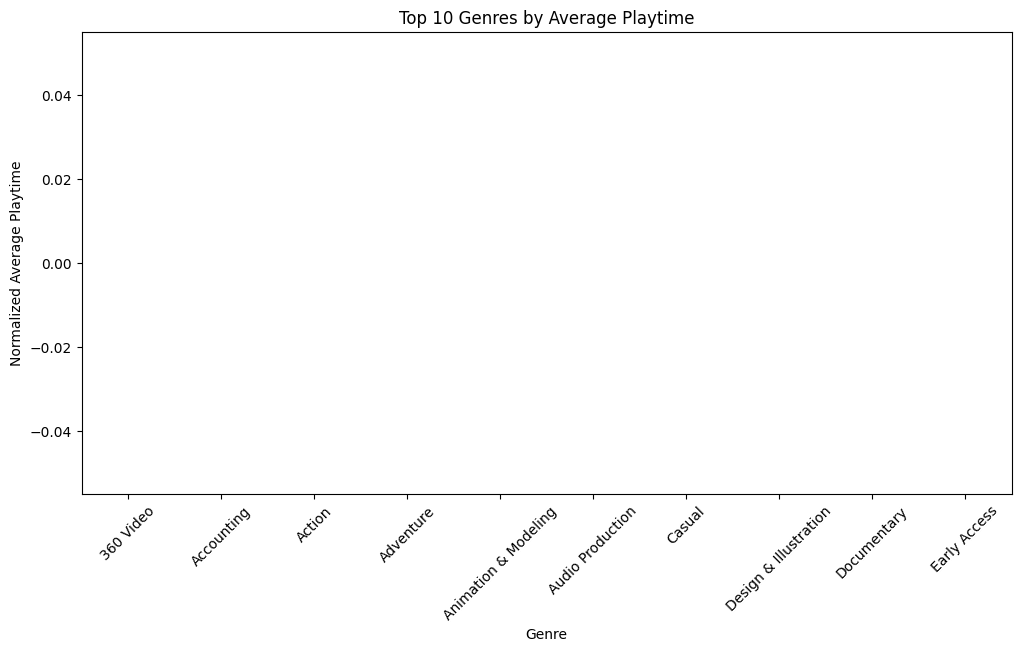

In [182]:
# Playtime by Genre
# Splitting Genres into individual genres and creating a long-format DataFrame
genres_expanded = df_cleaned['Genres'].str.get_dummies(sep=',')
df_with_genres = df_cleaned[['Average playtime forever']].join(genres_expanded)

# Step 2: Calculate mean playtime for each genre
genre_playtime = {}
for genre in genres_expanded.columns:
    # Select rows where the genre is present (value = 1) and compute mean playtime
    mean_playtime = df_with_genres[df_with_genres[genre] == 1]['Average playtime forever'].mean()
    genre_playtime[genre] = mean_playtime

# Convert to a Series and sort
genre_playtime = pd.Series(genre_playtime).sort_values(ascending=False)[:10]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_playtime.index, y=genre_playtime.values)
plt.xticks(rotation=45)
plt.title('Top 10 Genres by Average Playtime')
plt.xlabel('Genre')
plt.ylabel('Normalized Average Playtime')
plt.show()

In [153]:
# One-hot encode Genres (splitting multi-genre entries)
df_cleaned['Genres'] = df_cleaned['Genres'].fillna('Unknown')
genres_expanded = df_cleaned['Genres'].str.get_dummies(sep=',')
df_cleaned = pd.concat([df_cleaned, genres_expanded], axis=1)

In [154]:
# Computing and printing the mean of Metacritic score
print("Genre-based mean of Metacritic score (example for Action):", df_cleaned[df_cleaned['Genres'].str.contains('Action', na=False)]['Metacritic score'].mean())
print("Overall mean of Metacritic score:", df_cleaned['Metacritic score'].mean())

# Computing and printing the median of Estimated owners and Price
print("Median of Estimated owners:", df_cleaned['Estimated owners'].median())
print("Median of Price:", df_cleaned['Price'].median())

# Computing the number of genre columns after one-hot encoding
genres_expanded = df_cleaned['Genres'].str.get_dummies(sep=',')
print("Number of genre columns after one-hot encoding:", genres_expanded.shape[1])

Genre-based mean of Metacritic score (example for Action): 0.0074783574932016416
Overall mean of Metacritic score: 0.006359098188369532
Median of Estimated owners: 0.0
Median of Price: 0.0
Number of genre columns after one-hot encoding: 35


In [126]:
# Normalizing numerical features (playtime, price, owners)
scaler = MinMaxScaler()
numerical_cols = ['Average playtime forever', 'Price', 'Estimated owners', 'Peak CCU', 'Metacritic score']

if df_cleaned.shape[0] > 0:
    df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
    print("Normalization successful!")
else:
    print("Error: df_cleaned is empty. No rows available for normalization.")

Normalization successful!


In [129]:
# Feature Engineering
df_cleaned['Price_to_Playtime'] = df_cleaned['Price'] / (df_cleaned['Average playtime forever'] + 1e-6)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between Price and Peak CCU: nan


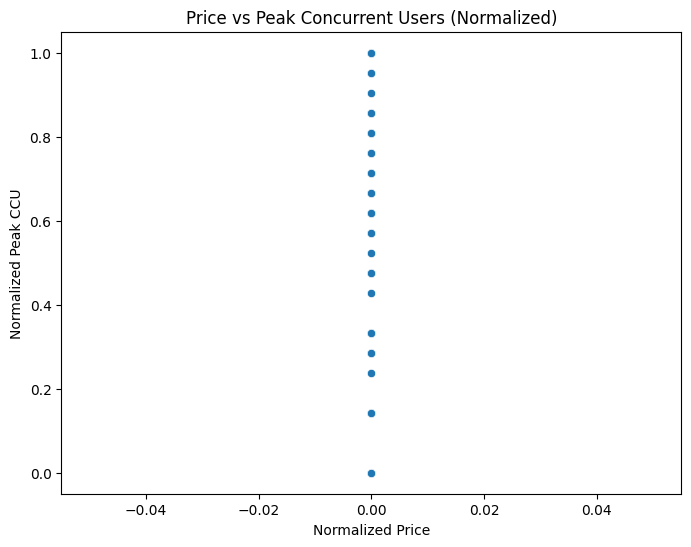

In [175]:
# Price vs Peak CCU Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Peak CCU', data=df_cleaned)
plt.title('Price vs Peak Concurrent Users (Normalized)')
plt.xlabel('Normalized Price')
plt.ylabel('Normalized Peak CCU')
correlation = df_cleaned['Price'].corr(df_cleaned['Peak CCU'])
print(f"Correlation between Price and Peak CCU: {correlation:.2f}")

In [132]:
# Add a price-to-playtime ratio
df_cleaned['Price_to_Playtime'] = df_cleaned['Price'] / (df_cleaned['Average playtime forever'] + 1e-6)  # Avoid division by zero

In [133]:
# Features: Price, Metacritic score, and top genres
features = ['Price', 'Metacritic score'] + genres_expanded.columns.tolist()
X = df_cleaned[features]
y = df_cleaned['Average playtime forever']

In [134]:
print("\nStatistical Summary of Numerical Features:")
stats = df_cleaned[numerical_cols + ['Price_to_Playtime']].describe()
print(stats)
print("\nVariance of Numerical Features:")
print(df_cleaned[numerical_cols + ['Price_to_Playtime']].var())


Statistical Summary of Numerical Features:
       Average playtime forever    Price  Estimated owners      Peak CCU  \
count              97410.000000  97410.0      9.741000e+04  97410.000000   
mean                   0.000630      0.0      1.267090e-04      0.013452   
std                    0.007332      0.0      5.985601e-03      0.102109   
min                    0.000000      0.0      0.000000e+00      0.000000   
25%                    0.000000      0.0      0.000000e+00      0.000000   
50%                    0.000000      0.0      0.000000e+00      0.000000   
75%                    0.000000      0.0      7.786537e-07      0.000000   
max                    1.000000      0.0      1.000000e+00      1.000000   

       Metacritic score  Price_to_Playtime  
count      97410.000000            97410.0  
mean           0.030507                0.0  
std            0.149953                0.0  
min            0.000000                0.0  
25%            0.000000                0.0  
5

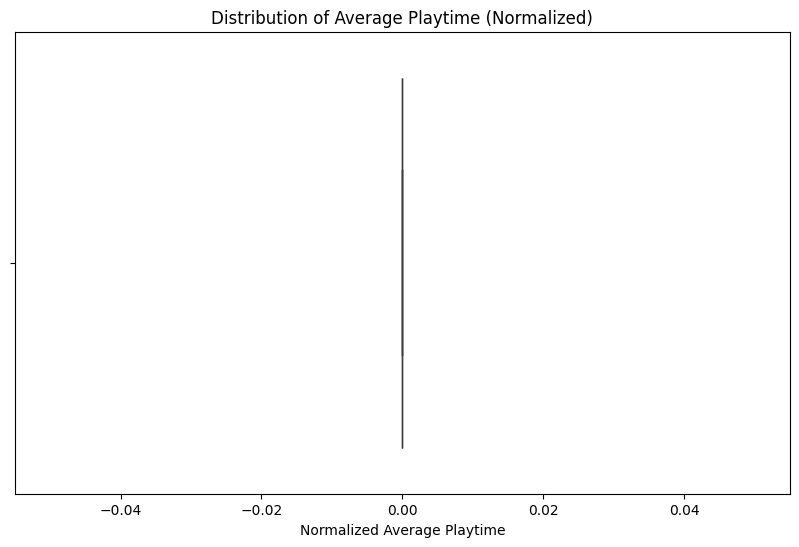

In [177]:
# Visualization 2: Boxplot of playtime distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Average playtime forever'])
plt.title('Distribution of Average Playtime (Normalized)')
plt.xlabel('Normalized Average Playtime')
plt.show()

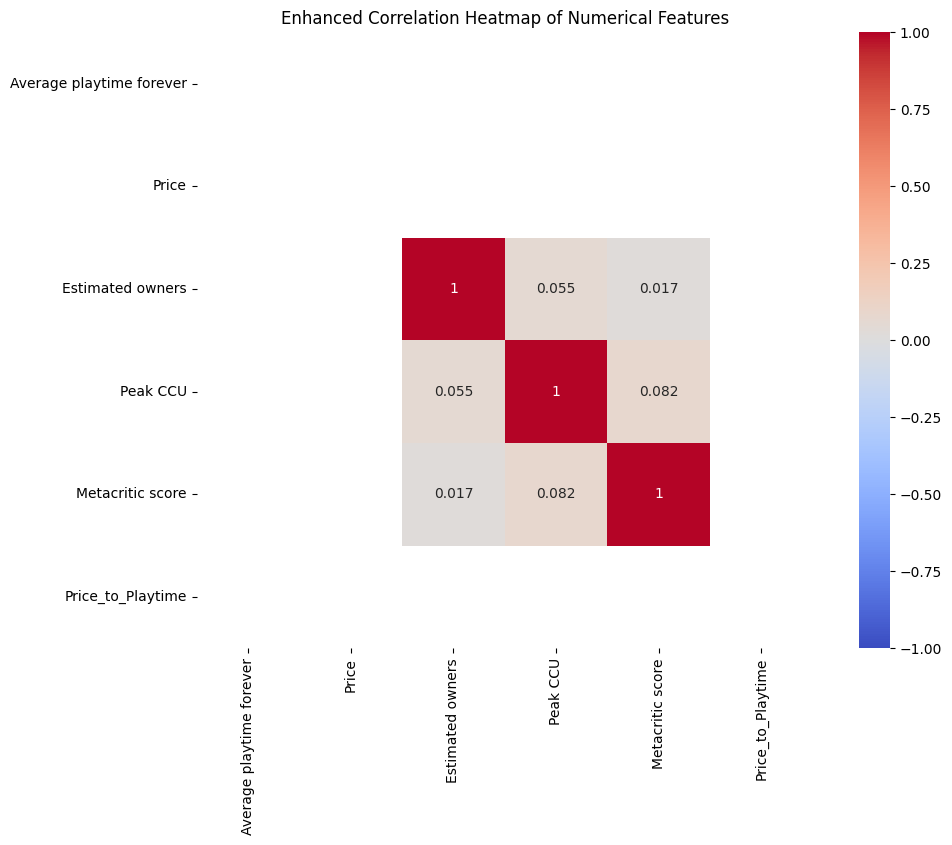

In [183]:
# Enhanced Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[numerical_cols + ['Price_to_Playtime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)
plt.title('Enhanced Correlation Heatmap of Numerical Features')
plt.show()

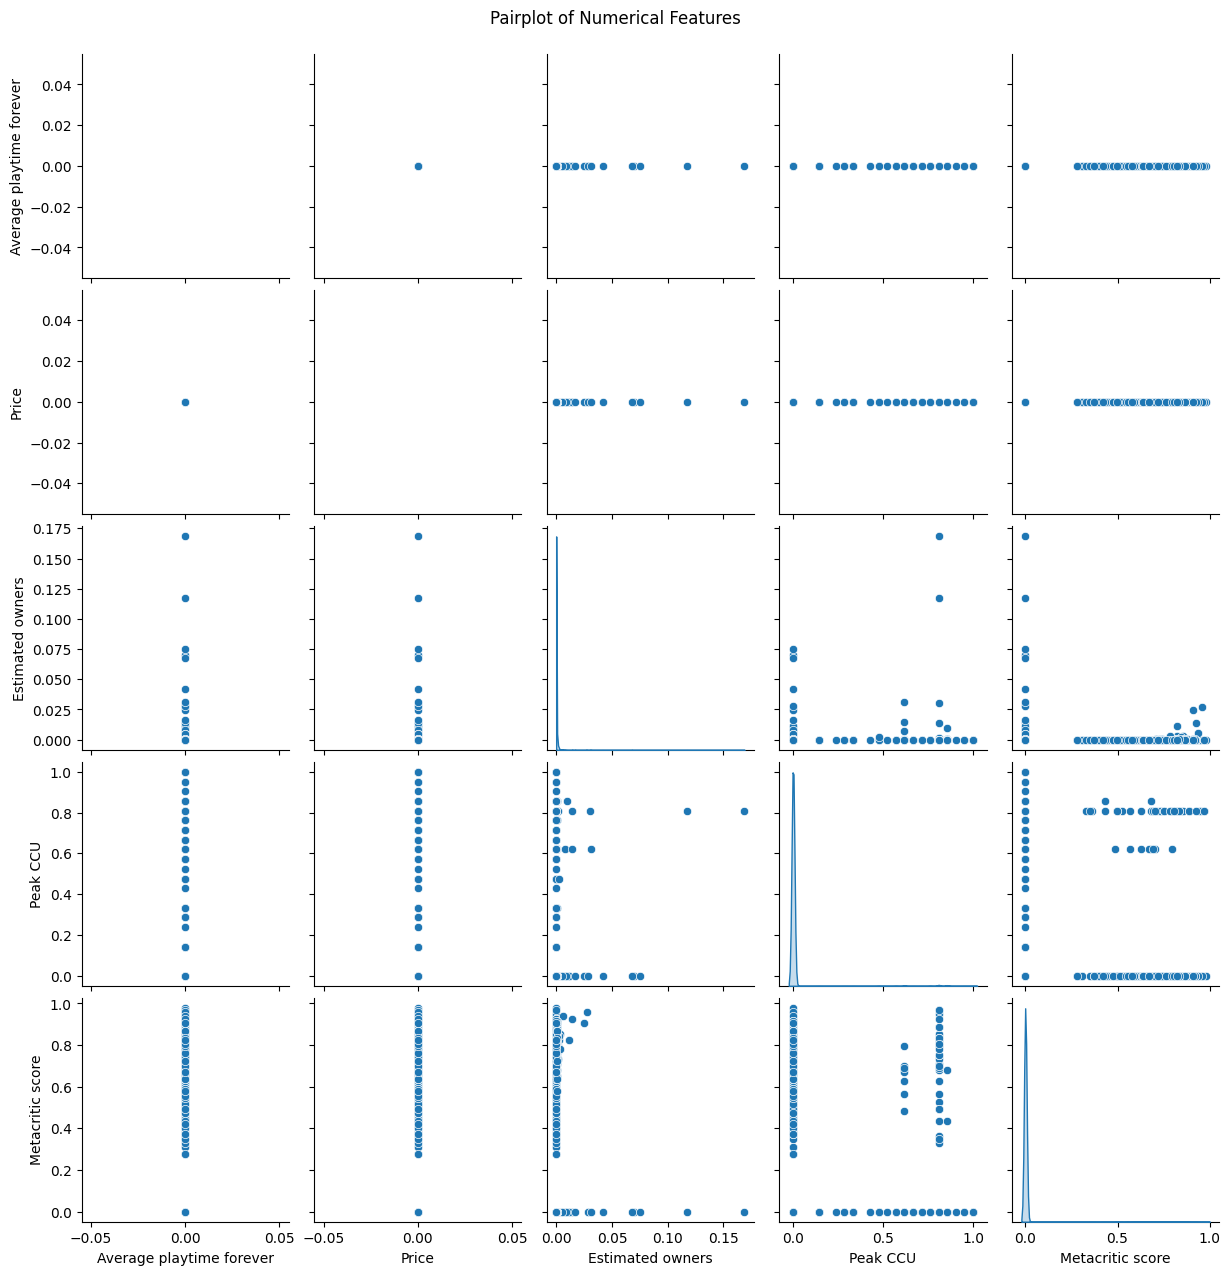

In [179]:
# Pairplot of key features
sns.pairplot(df_cleaned[numerical_cols], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [139]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
# Training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [141]:
# Predicting and evaluating Linear Regression
y_pred = model.predict(X_test)
print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")


Linear Regression Results:
Mean Squared Error: 0.0000
R^2 Score: 0.0194


In [142]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest Results:")
print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"R^2 Score: {rf_r2:.4f}")


Random Forest Results:
Mean Squared Error: 0.0001
R^2 Score: -0.0452


In [143]:
# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
print("\nKNN Results:")
print(f"Mean Squared Error: {knn_mse:.4f}")
print(f"R^2 Score: {knn_r2:.4f}")


KNN Results:
Mean Squared Error: 0.0001
R^2 Score: -0.0483


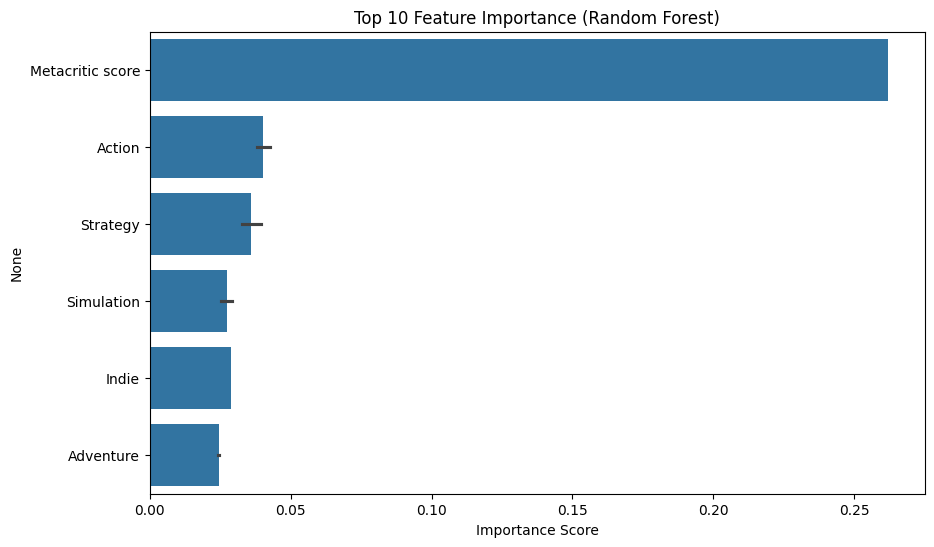

In [144]:
# Feature importance from Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()


Decision Tree Results:
Mean Squared Error: 0.0001
R^2 Score: -0.1206


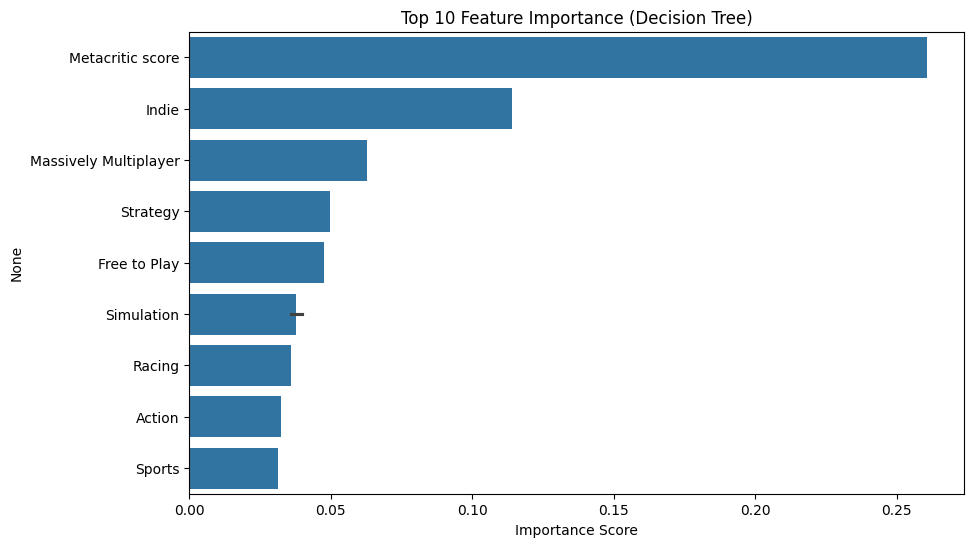

In [184]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print("\nDecision Tree Results:")
print(f"Mean Squared Error: {dt_mse:.4f}")
print(f"R^2 Score: {dt_r2:.4f}")

# Feature Importance from Decision Tree
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Top 10 Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.show()

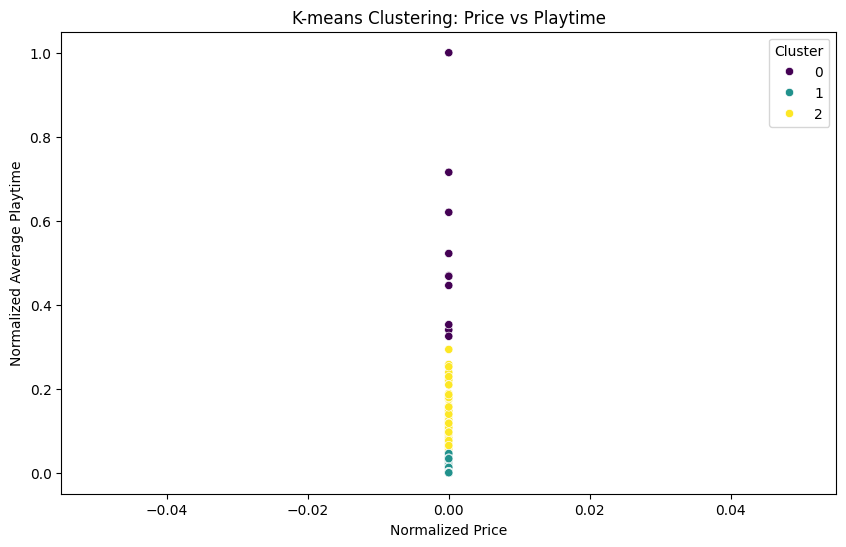

In [145]:
# Clustering with K-means
kmeans_data = df_cleaned[['Average playtime forever', 'Price']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(kmeans_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Average playtime forever', hue='Cluster', data=df_cleaned, palette='viridis')
plt.title('K-means Clustering: Price vs Playtime')
plt.xlabel('Normalized Price')
plt.ylabel('Normalized Average Playtime')
plt.show()

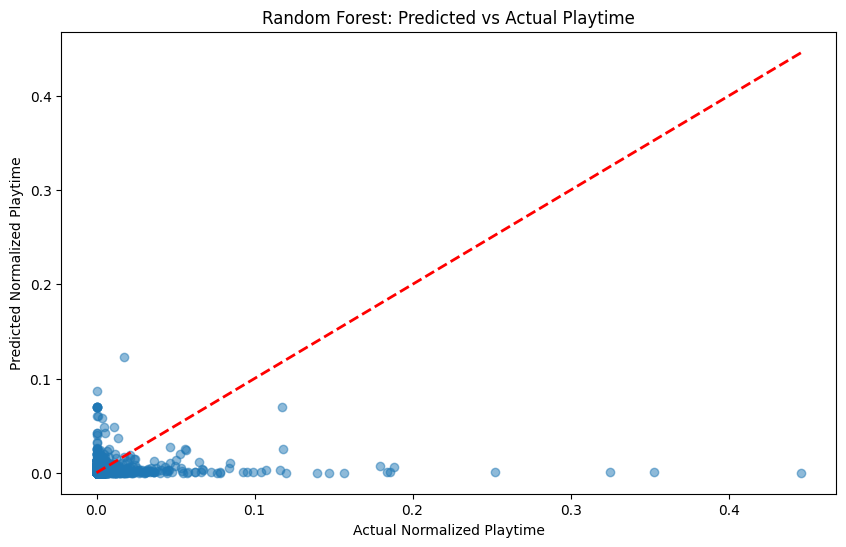

In [185]:
# Prediction vs Actual Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Predicted vs Actual Playtime')
plt.xlabel('Actual Normalized Playtime')
plt.ylabel('Predicted Normalized Playtime')
plt.show()

In [186]:
print("Playtime Stats:", df_cleaned['Average playtime forever'].describe())
print("Variance:", df_cleaned['Average playtime forever'].var())

Playtime Stats: count    82400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Average playtime forever, dtype: float64
Variance: 0.0


In [187]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Random Forest Cross-Validation R²:", rf_cv_scores.mean())

Random Forest Cross-Validation R²: -0.26954204749331045


In [188]:
q1, q3 = df_cleaned['Average playtime forever'].quantile([0.25, 0.75])
iqr = q3 - q1
df_cleaned = df_cleaned[(df_cleaned['Average playtime forever'] >= q1 - 1.5 * iqr) &
                        (df_cleaned['Average playtime forever'] <= q3 + 1.5 * iqr)]

In [189]:
# Save cleaned dataset for further use
df_cleaned.to_csv('/content/games.csv', index=False)
print("Cleaned dataset saved as '/content/games.csv'")

Cleaned dataset saved as '/content/games.csv'
